/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/proplot/__init__.py:9: ProPlotWarning: Rebuilding font cache.
  from .config import *  # noqa: F401 F403


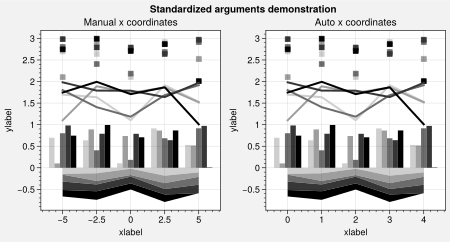

In [1]:
import proplot as plot
import numpy as np

N = 5
state = np.random.RandomState(51423)
with plot.rc.context({'axes.prop_cycle': plot.Cycle('Grays', N=N, left=0.3)}):
    # Figure and sample data
    x = np.linspace(-5, 5, N)
    y = state.rand(N, 5)
    fig, axs = plot.subplots(ncols=2, share=False)
    axs.format(xlabel='xlabel', ylabel='ylabel')
    axs.format(suptitle='Standardized arguments demonstration')

    # Plot by passing both x and y coordinates
    ax = axs[0]
    ax.area(x, -1 * y / N, stack=True)
    ax.bar(x, y, linewidth=0, alpha=1, width=0.8)
    ax.plot(x, y + 1, linewidth=2)
    ax.scatter(x, y + 2, marker='s', markersize=5**2)
    ax.format(title='Manual x coordinates')

    # Plot by passing just y coordinates
    # Default x coordinates are inferred from DataFrame,
    # inferred from DataArray, or set to np.arange(0, y.shape[0])
    ax = axs[1]
    ax.area(-1 * y / N, stack=True)
    ax.bar(y, linewidth=0, alpha=1)
    ax.plot(y + 1, linewidth=2)
    ax.scatter(y + 2, marker='s', markersize=5**2)
    ax.format(title='Auto x coordinates')

In [2]:
import xarray as xr
import numpy as np
import pandas as pd

# DataArray
state = np.random.RandomState(51423)
data = (
    np.sin(np.linspace(0, 2 * np.pi, 20))[:, None]
    + state.rand(20, 8).cumsum(axis=1)
)
coords = {
    'x': xr.DataArray(
        np.linspace(0, 1, 20),
        dims=('x',),
        attrs={'long_name': 'distance', 'units': 'km'}
    ),
    'num': xr.DataArray(
        np.arange(0, 80, 10),
        dims=('num',),
        attrs={'long_name': 'parameter'}
    )
}
da = xr.DataArray(
    data, dims=('x', 'num'), coords=coords, name='energy', attrs={'units': 'kJ'}
)

# DataFrame
data = (
    (np.cos(np.linspace(0, 2 * np.pi, 20))**4)[:, None] + state.rand(20, 5)**2
)
ts = pd.date_range('1/1/2000', periods=20)
df = pd.DataFrame(data, index=ts, columns=['foo', 'bar', 'baz', 'zap', 'baf'])
df.name = 'data'
df.index.name = 'date'
df.columns.name = 'category'

(<matplotlib.lines.Line2D at 0x7f3fda177160>,
 <matplotlib.lines.Line2D at 0x7f3fda183100>)

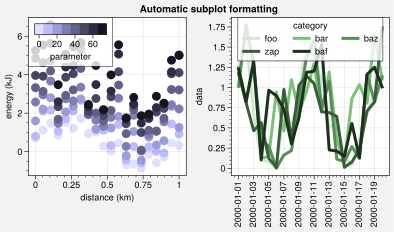

In [3]:
import proplot as plot
fig, axs = plot.subplots(ncols=2, refwidth=2.2, share=0)
axs.format(suptitle='Automatic subplot formatting')

# Plot DataArray
cycle = plot.Cycle('dark blue', fade=90, space='hpl', N=da.shape[1])
axs[0].scatter(da, cycle=cycle, lw=3, colorbar='ul', colorbar_kw={'locator': 20})

# Plot Dataframe
cycle = plot.Cycle('dark green', fade=90, space='hpl', N=df.shape[1])
axs[1].plot(df, cycle=cycle, lw=3, legend='uc')

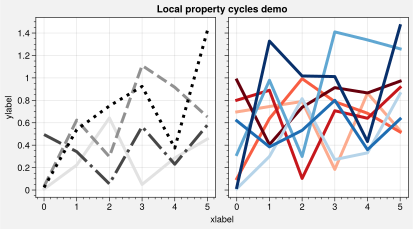

In [4]:
import proplot as plot
import numpy as np

# Sample data
N = 4
state = np.random.RandomState(51423)
data1 = state.rand(6, N)
data2 = state.rand(6, N) * 1.5

with plot.rc.context({'lines.linewidth': 3}):
    # Figure
    fig, axs = plot.subplots(ncols=2)
    axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Local property cycles demo')

    # Use property cycle for columns of 2D input data
    axs[0].plot(
        data1 * data2,
        cycle='black',
        cycle_kw={'linestyle': ('-', '--', '-.', ':')}
    )

    # Use property cycle with successive plot() calls
    for i in range(data1.shape[1]):
        axs[1].plot(data1[:, i], cycle='Reds', cycle_kw={'N': N, 'left': 0.3})
    for i in range(data1.shape[1]):
        axs[1].plot(data2[:, i], cycle='Blues', cycle_kw={'N': N, 'left': 0.3})

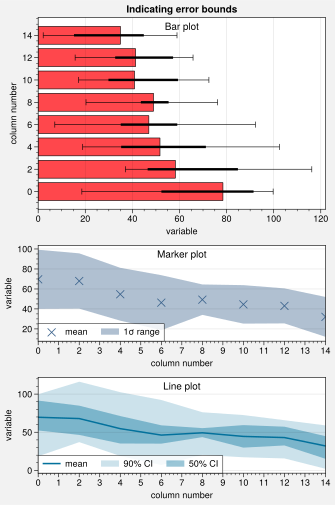

In [5]:
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'

# Sample data
state = np.random.RandomState(51423)
data = state.rand(20, 8).cumsum(axis=0).cumsum(axis=1)[:, ::-1]
data = data + 20 * state.normal(size=(20, 8)) + 30
data = pd.DataFrame(data, columns=np.arange(0, 16, 2))
data.name = 'variable'

# Figure
fig, axs = plot.subplots(
    nrows=3, refaspect=1.5, refwidth=4,
    share=0, hratios=(2, 1, 1)
)
axs.format(suptitle='Indicating error bounds')
axs[1:].format(xlabel='column number', xticks=1, xgrid=False)

# Medians and percentile ranges
ax = axs[0]
obj = ax.barh(
    data, color='light red', legend=True,
    median=True, barpctile=90, boxpctile=True,
    # median=True, barpctile=(5, 95), boxpctile=(25, 75)  # equivalent
)
ax.format(title='Column statistics')
ax.format(ylabel='column number', title='Bar plot', ygrid=False)

# Means and standard deviation range
ax = axs[1]
ax.scatter(
    data, color='denim', marker='x', markersize=8**2, linewidth=0.8, legend='ll',
    label='mean', shadelabel=True,
    mean=True, shadestd=1,
    # mean=True, shadestd=(-1, 1)  # equivalent
)
ax.format(title='Marker plot')

# User-defined error bars
ax = axs[2]
means = data.mean(axis=0)
means.name = data.name
shadedata = np.percentile(data, (25, 75), axis=0)  # dark shading
fadedata = np.percentile(data, (5, 95), axis=0)  # light shading
ax.plot(
    means,
    shadedata=shadedata, fadedata=fadedata,
    label='mean', shadelabel='50% CI', fadelabel='90% CI',
    color='ocean blue', barzorder=0, boxmarker=False, legend='ll',
)
ax.format(title='Line plot')
plot.rc.reset()

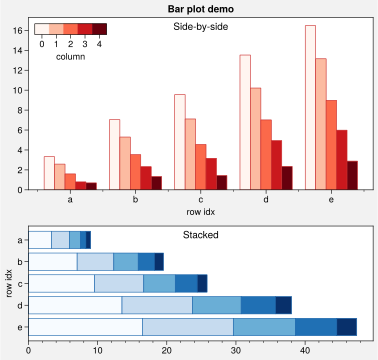

In [6]:
import proplot as plot
import numpy as np
import pandas as pd

# Sample data
state = np.random.RandomState(51423)
data = state.rand(5, 5).cumsum(axis=0).cumsum(axis=1)[:, ::-1]
data = pd.DataFrame(
    data, columns=pd.Index(np.arange(1, 6), name='column'),
    index=pd.Index(['a', 'b', 'c', 'd', 'e'], name='row idx')
)

# Figure
plot.rc.titleloc = 'uc'
fig, axs = plot.subplots(nrows=2, refaspect=2, refwidth=4.8, share=0, hratios=(3, 2))

# Side-by-side bars
ax = axs[0]
obj = ax.bar(
    data, cycle='Reds', colorbar='ul',
    edgecolor='red9', colorbar_kw={'frameon': False}
)
ax.format(
    xlocator=1, xminorlocator=0.5, ytickminor=False,
    title='Side-by-side', suptitle='Bar plot demo'
)

# Stacked bars
ax = axs[1]
obj = ax.barh(
    data.iloc[::-1, :], cycle='Blues',
    legend='ur', edgecolor='blue9', stack=True
)
ax.format(title='Stacked')
axs.format(grid=False)
plot.rc.reset()

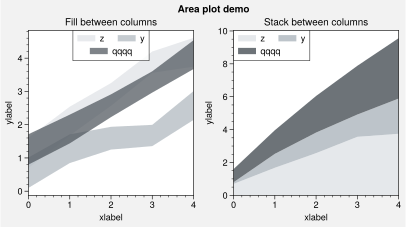

In [7]:
import proplot as plot
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = state.rand(5, 3).cumsum(axis=0)
cycle = ('gray3', 'gray5', 'gray7')

# Figure
fig, axs = plot.subplots(ncols=2, refwidth=2.3, share=0)
axs.format(grid=False, xlabel='xlabel', ylabel='ylabel', suptitle='Area plot demo')

# Overlaid area patches
ax = axs[0]
ax.area(
    np.arange(5), data, data + state.rand(5)[:, None], cycle=cycle, alpha=0.7,
    legend='uc', legend_kw={'center': True, 'ncols': 2, 'labels': ['z', 'y', 'qqqq']},
)
ax.format(title='Fill between columns')

# Stacked area patches
ax = axs[1]
ax.area(
    np.arange(5), data, stack=True, cycle=cycle, alpha=0.8,
    legend='ul', legend_kw={'center': True, 'ncols': 2, 'labels': ['z', 'y', 'qqqq']},
)
ax.format(title='Stack between columns')

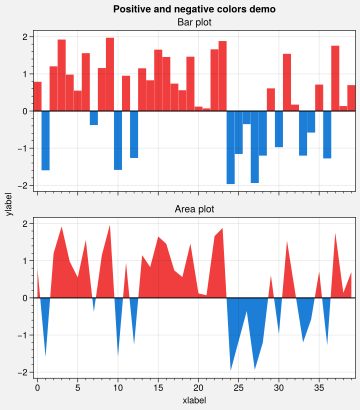

In [8]:
import proplot as plot
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = 4 * (state.rand(40) - 0.5)

# Figure
fig, axs = plot.subplots(nrows=2, refaspect=2, figwidth=5)
axs.format(
    xmargin=0, xlabel='xlabel', ylabel='ylabel', grid=True,
    suptitle='Positive and negative colors demo',
)
axs.axhline(0, color='k', linewidth=1)  # zero line

# Bar plot
axs[0].bar(data, width=1, edgecolor='none', negpos=True)
axs[0].format(title='Bar plot')

# Area plot
axs[1].area(data, negpos=True)
axs[1].format(title='Area plot')

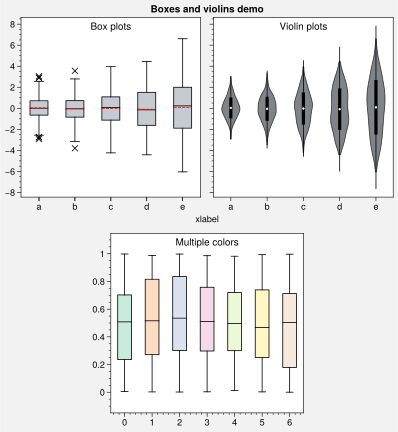

In [9]:
import proplot as plot
import numpy as np
import pandas as pd

# Sample data
N = 500
state = np.random.RandomState(51423)
data = state.normal(size=(N, 5)) + 2 * (state.rand(N, 5) - 0.5) * np.arange(5)
data = pd.DataFrame(
    data, columns=pd.Index(['a', 'b', 'c', 'd', 'e'], name='xlabel')
)

# Figure
fig, axs = plot.subplots([[1, 1, 2, 2], [0, 3, 3, 0]])
axs.format(grid=False, suptitle='Boxes and violins demo')

# Box plots
ax = axs[0]
obj1 = ax.boxplot(
    data, means=True, meancolor='red', marker='x', fillcolor='gray5',
)
ax.format(title='Box plots', titleloc='uc')

# Violin plots
ax = axs[1]
obj2 = ax.violinplot(
    data, fillcolor='gray7',
    points=500, bw_method=0.3, means=True,
)
ax.format(title='Violin plots', titleloc='uc')

# Boxes with different colors
ax = axs[2]
data = state.rand(100, 7)
colors = plot.Colors('pastel2')  # list of colors from the cycle
ax.boxplot(data, fillcolor=colors, orientation='horizontal')
ax.format(title='Multiple colors', titleloc='uc', ymargin=0.15)

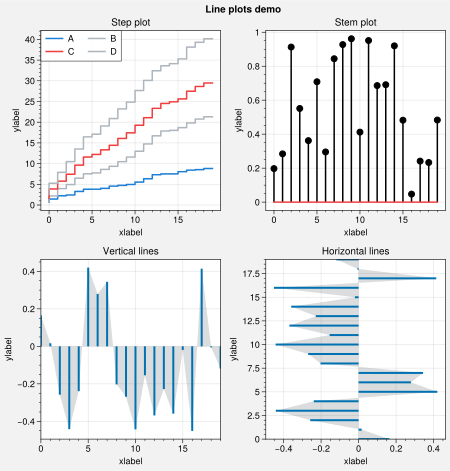

In [10]:
import proplot as plot
import numpy as np
state = np.random.RandomState(51423)
fig, axs = plot.subplots(ncols=2, nrows=2, share=0)
axs.format(suptitle='Line plots demo', xlabel='xlabel', ylabel='ylabel')

# Step
ax = axs[0]
data = state.rand(20, 4).cumsum(axis=1).cumsum(axis=0)
cycle = ('blue7', 'gray5', 'red7', 'gray5')
ax.step(data, cycle=cycle, labels=list('ABCD'), legend='ul', legend_kw={'ncol': 2})
ax.format(title='Step plot')

# Stems
ax = axs[1]
data = state.rand(20)
ax.stem(data, linefmt='k-')
ax.format(title='Stem plot')

# Vertical lines
gray = 'gray7'
data = state.rand(20) - 0.5
ax = axs[2]
ax.area(data, color=gray, alpha=0.2)
ax.vlines(data, negpos=True, linewidth=2)
ax.format(title='Vertical lines')

# Horizontal lines
ax = axs[3]
ax.areax(data, color=gray, alpha=0.2)
ax.hlines(data, negpos=True, linewidth=2)
ax.format(title='Horizontal lines')

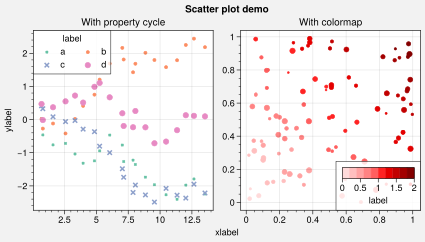

In [11]:
import proplot as plot
import numpy as np
import pandas as pd

# Sample data
state = np.random.RandomState(51423)
x = (state.rand(20) - 0).cumsum()
data = (state.rand(20, 4) - 0.5).cumsum(axis=0)
data = pd.DataFrame(data, columns=pd.Index(['a', 'b', 'c', 'd'], name='label'))

# Figure
fig, axs = plot.subplots(ncols=2, share=1)
axs.format(suptitle='Scatter plot demo')

# Scatter plot with property cycler
ax = axs[0]
ax.format(title='With property cycle')
obj = ax.scatter(
    x, data, legend='ul', cycle='Set2', legend_kw={'ncols': 2},
    cycle_kw={'marker': ['x', 'o', 'x', 'o'], 'markersize': [5, 10, 20, 30]}
)

# Scatter plot with colormap
ax = axs[1]
ax.format(title='With colormap')
data = state.rand(2, 100)
obj = ax.scatter(
    *data, color=data.sum(axis=0), size=state.rand(100), smin=3, smax=30,
    marker='o', cmap='dark red', cmap_kw={'fade': 90}, vmin=0, vmax=2,
    colorbar='lr', colorbar_kw={'label': 'label', 'locator': 0.5},
)
axs.format(xlabel='xlabel', ylabel='ylabel')

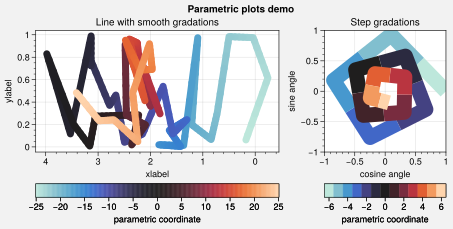

In [12]:
import proplot as plot
import numpy as np
fig, axs = plot.subplots(
    share=0, ncols=2, wratios=(2, 1),
    figwidth='16cm', refaspect=(2, 1)
)
axs.format(suptitle='Parametric plots demo')
cmap = 'IceFire'

# Sample data
state = np.random.RandomState(51423)
N = 50
x = (state.rand(N) - 0.52).cumsum()
y = state.rand(N)
c = np.linspace(-N / 2, N / 2, N)  # color values

# Parametric line with smooth gradations
ax = axs[0]
m = ax.parametric(
    x, y, c, cmap=cmap, lw=7, interp=5, capstyle='round', joinstyle='round'
)
ax.format(xlabel='xlabel', ylabel='ylabel', title='Line with smooth gradations')
ax.colorbar(m, loc='b', label='parametric coordinate', locator=5)

# Sample data
N = 12
radii = np.linspace(1, 0.2, N + 1)
angles = np.linspace(0, 4 * np.pi, N + 1)
x = radii * np.cos(1.4 * angles)
y = radii * np.sin(1.4 * angles)
c = np.linspace(-N / 2, N / 2, N + 1)

# Parametric line with stepped gradations
ax = axs[1]
m = ax.parametric(x, y, c, cmap=cmap, lw=15)
ax.format(
    xlim=(-1, 1), ylim=(-1, 1), title='Step gradations',
    xlabel='cosine angle', ylabel='sine angle'
)
ax.colorbar(m, loc='b', maxn=10, label='parametric coordinate')